# Read csv files and plot learning curves for FedAvg experiment 2

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
from os import walk
from os.path import join
os.getcwd()

'C:\\Users\\wangyuan\\myfl-1\\Federated-Learning-PyTorch'

In [54]:
os.chdir('src')
os.getcwd()

'C:\\Users\\wangyuan\\myfl-1\\Federated-Learning-PyTorch\\src'

In [55]:
from utils import make_learning_curve as mlc

In [56]:
file_path_1 = '..\\save\\figures-mnist\\data_src_exp_4_non_iid\\test_acc'
file_path_2 = '..\\save\\figures-mnist\\data_src_exp_4_non_iid\\train_loss'
_, _, filenames_1 = next(walk(file_path_1))
_, _, filenames_2 = next(walk(file_path_2))

In [57]:
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
files_to_read_2 = [join(file_path_2,f) for f in filenames_2]

In [58]:
df_1 = [pd.read_csv(f) for f in files_to_read_1]
df_2 = [pd.read_csv(f) for f in files_to_read_2]

In [65]:
# manually set the label names
run_labels=[0]*5
run_labels[0] = '$E=5$'
run_labels[1] = '$E=25$'
run_labels[2] = '$E=50$'
run_labels[3] = '$E=100$'
run_labels[4] = '$E=200$'


# define linestyle and color
run_colors, run_linestyles = [0]*5, [0]*5
run_colors[0] = 'dodgerblue'
run_colors[1] = 'deeppink'
run_colors[2] = 'orange'
run_colors[3] = 'seagreen'
run_colors[4] = 'lightsteelblue'


run_linestyles[0] = '-'
run_linestyles[1] = '-'
run_linestyles[2] = '-'
run_linestyles[3] = '-'
run_linestyles[4] = '-'

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

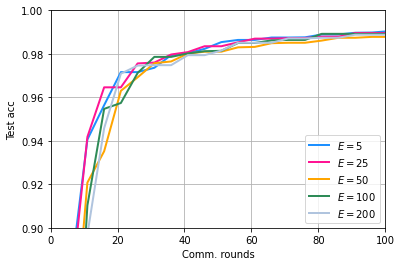

In [67]:
# plot the first figure for experiment 2 with iid data 
step_1=5
plt.figure()
for i, data in enumerate(df_1):
    xlist = data['Step'].tolist()
    ylist = mlc(data['Value'].tolist())
    x = [dx for j, dx in enumerate(xlist) if j % step_1 == 0]
    y = [dy for j, dy in enumerate(ylist) if j % step_1 == 0]   
    x.append(xlist[-1])
    y.append(ylist[-1])       
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,100)
plt.ylim(0.9,1.0)
plt.xlabel('Comm. rounds')
plt.ylabel('Test acc')
plt.savefig('..\\save\\figures-mnist\\fedavg-exp-4-non-iid-acc-r100.png')

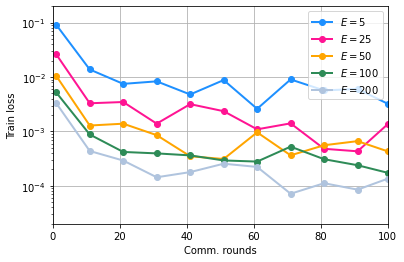

In [68]:
# plot the first figure for experiment 2 with non-iid data 
step_2=10
plt.figure()
for i, data in enumerate(df_2):
    xlist = data['Step'].tolist()
    ylist = data['Value'].tolist()
#     step_2 = 5 if i==1 else 5
    x = [dx for j, dx in enumerate(xlist) if j % step_2 == 0]
    y = [dy for j, dy in enumerate(ylist) if j % step_2 == 0]
    x.append(xlist[-1])
    y.append(ylist[-1])   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i], linewidth=2, marker='o')
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.yscale('log')
    plt.legend(loc='upper right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,100)
plt.ylim(2e-5,2e-1)
plt.xlabel('Comm. rounds')
plt.ylabel('Train loss')
plt.savefig('..\\save\\figures-mnist\\fedavg-exp-4-non-iid-loss-r100.png')